In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
os.getcwd()

'/Users/ashwinivalmiki'

In [5]:
# Loading csv files to list
list_=['/Users/ashwinivalmiki/Downloads/item_categories.csv',
'/Users/ashwinivalmiki/Downloads/items.csv', 
'/Users/ashwinivalmiki/Downloads/sales_train.csv',
'/Users/ashwinivalmiki/Downloads/sample_submission.csv',
'/Users/ashwinivalmiki/Downloads/shops.csv',
'/Users/ashwinivalmiki/Downloads/test.csv'] 


In [6]:
# separating files in the list
df_list=[]
for i in list_:
    name=input()
    name=pd.read_csv(i)
    df_list.append(name)
    
item_categories = df_list[0]
items = df_list[1]
sales_train = df_list[2]
shops = df_list[3]
test = df_list[4]


item_categories
items
sales_train
shops
test
sample_submission


In [9]:
test=pd.read_csv('/Users/ashwinivalmiki/Downloads/test.csv')
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [10]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [11]:
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [12]:
shops.head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [19]:
sales_train.isnull().sum() # to check if there is any missing value in any of the variable.

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [17]:
sales_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB


In [59]:
sales_train.shape

(2935849, 6)

In [18]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   ID       214200 non-null  int64
 1   shop_id  214200 non-null  int64
 2   item_id  214200 non-null  int64
dtypes: int64(3)
memory usage: 4.9 MB


In [20]:
train=sales_train.merge(items, on = 'item_id', how = 'left').merge(item_categories, on = 'item_category_id', how = 'left')
test= test.merge(items,on='item_id',how='left').merge(item_categories, on = 'item_category_id', how = 'left').merge(shops,on='ID',how='left')

In [22]:
train # We can observe previous sales_train data it contained 6 columns now it is containing more columns. 

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name
0,02.01.2013,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,03.01.2013,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил
2,05.01.2013,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил
3,06.01.2013,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил
4,15.01.2013,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства
...,...,...,...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0,V/A Nu Jazz Selection (digipack),55,Музыка - CD локального производства
2935845,09.10.2015,33,25,7460,299.00,1.0,V/A The Golden Jazz Collection 1 2CD,55,Музыка - CD локального производства
2935846,14.10.2015,33,25,7459,349.00,1.0,V/A The Best Of The 3 Tenors,55,Музыка - CD локального производства
2935847,22.10.2015,33,25,7440,299.00,1.0,V/A Relax Collection Planet MP3 (mp3-CD) (jewel),57,Музыка - MP3


In [23]:
test.head() 

,ID,shop_id,item_id,item_name,item_category_id,item_category_name,item_cnt_month
0,0,5,5037,"NHL 15 [PS3, русские субтитры]",19,Игры - PS3,0.5
1,1,5,5320,ONE DIRECTION Made In The A.M.,55,Музыка - CD локального производства,0.5
2,2,5,5233,"Need for Speed Rivals (Essentials) [PS3, русск...",19,Игры - PS3,0.5
3,3,5,5232,"Need for Speed Rivals (Classics) [Xbox 360, ру...",23,Игры - XBOX 360,0.5
4,4,5,5268,"Need for Speed [PS4, русская версия]",20,Игры - PS4,0.5


In [24]:
#converting date to datetime format
train['date']=pd.to_datetime(train['date'],format = '%d.%m.%Y')

In [25]:
train.dtypes

date                  datetime64[ns]
date_block_num                 int64
shop_id                        int64
item_id                        int64
item_price                   float64
item_cnt_day                 float64
item_name                     object
item_category_id               int64
item_category_name            object
dtype: object

In [27]:
train.shape

(2935849, 9)

In [33]:
#Creating additional columns
train['sales'] = train['item_price']*train['item_cnt_day']
train['year'] = pd.DatetimeIndex(train['date']).year
train['month'] = pd.DatetimeIndex(train['date']).month
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,sales,year,month
0,2013-01-02,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,999.00,2013,1
1,2013-01-03,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,899.00,2013,1
2,2013-01-05,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,-899.00,2013,1
3,2013-01-06,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил,1709.05,2013,1
4,2013-01-15,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства,1099.00,2013,1


In [35]:
train.shape

(2935849, 12)

<AxesSubplot:xlabel='item_price'>

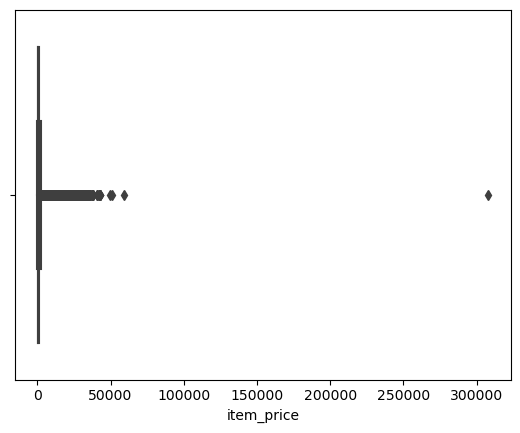

In [29]:
#Checking if there  are any outliers
sns.boxplot(x=train['item_price'])

In [ ]:
#An outlier is present after 3,00,000 , we are ignoring it by reducing the scale of it.

In [30]:
train[train["item_cnt_day"]>40000].head(30).reset_index() 

,index,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name


<AxesSubplot:xlabel='item_price'>

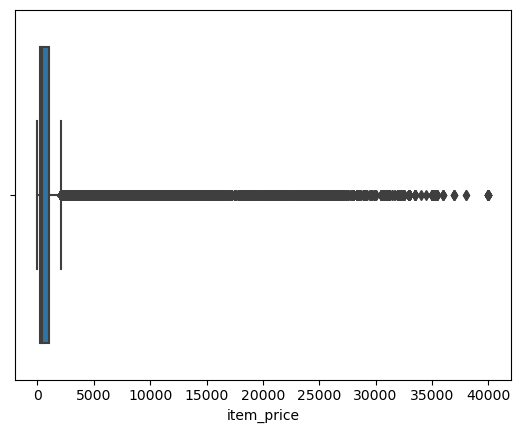

In [38]:
sns.boxplot(x=train['item_price'])

<AxesSubplot:xlabel='item_cnt_day'>

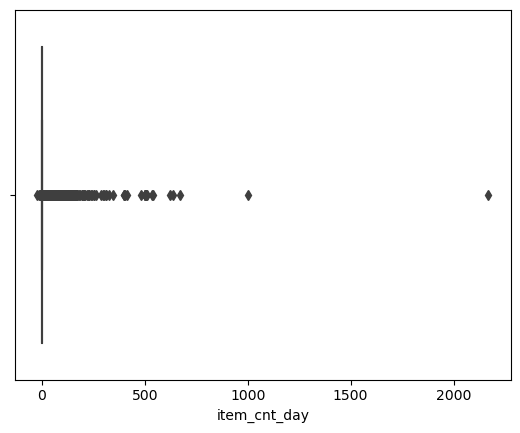

In [31]:
sns.boxplot(x=train['item_cnt_day']) # outlier is present around 2500

In [62]:
train[train["item_cnt_day"]>500].head(30).reset_index()

,index,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,sales,year,month


<AxesSubplot:xlabel='item_cnt_day'>

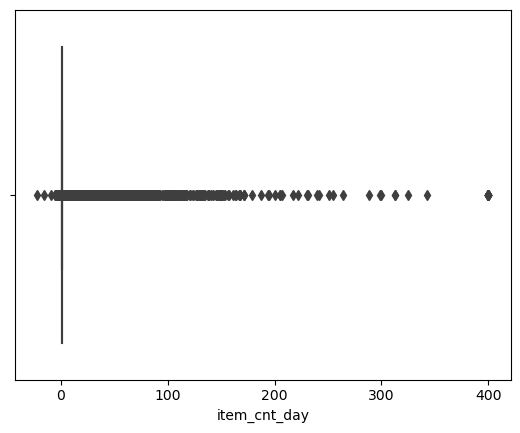

In [37]:
sns.boxplot(x=train['item_cnt_day'])

In [36]:
train['item_cnt_day'] = np.where(train['item_cnt_day']>400 , 400,train['item_cnt_day'] )

#cap item count >500 to 500 
#cap item price >40000 to 40000 
train['item_price'] = np.where(train['item_price']>40000 , 40000,train['item_price'] )
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,sales,year,month
0,2013-01-02,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,999.00,2013,1
1,2013-01-03,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,899.00,2013,1
2,2013-01-05,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,-899.00,2013,1
3,2013-01-06,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил,1709.05,2013,1
4,2013-01-15,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства,1099.00,2013,1


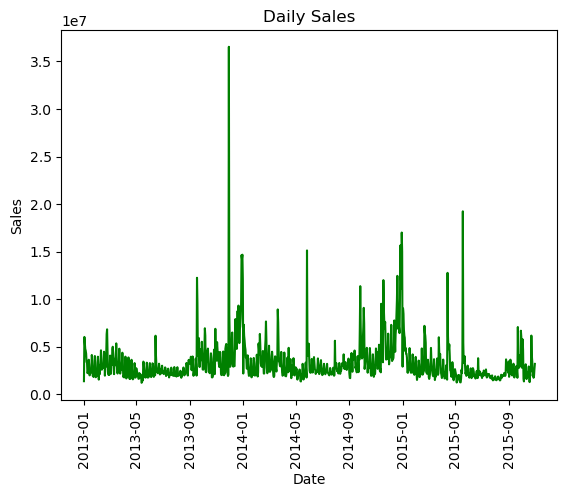

In [39]:
# From the train data we are grouping date and sales on that particular date and plotting the data.
date_sales = train.groupby('date', as_index=False)['sales'].sum().sort_values(by = 'date')

plt.plot(date_sales['date'], date_sales['sales'], color = 'g')
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('Sales')
plt.title('Daily Sales')
plt.show()

/Users/ashwinivalmiki/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


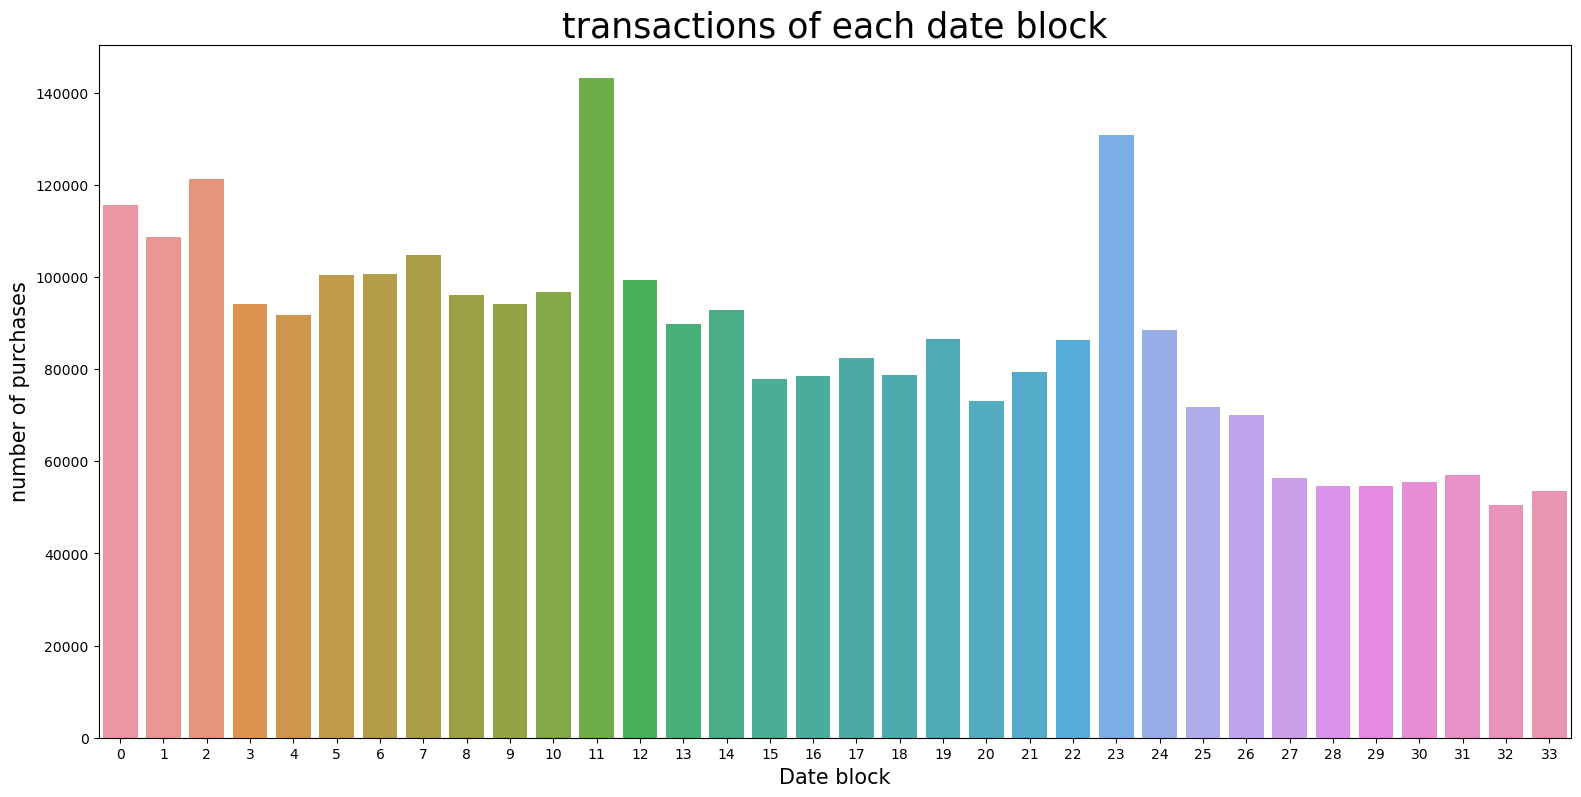

In [40]:
plt.rcParams['figure.figsize']=(19,9)
sns.countplot(train['date_block_num'])
plt.title('transactions of each date block',fontsize=25)
plt.xlabel('Date block', fontsize=15)
plt.ylabel('number of purchases', fontsize=15)
plt.show()

In [ ]:
#From the above diagram we can see, the sales amount slightly depends on the date block and 
#also slightly decreases over time. 

<AxesSubplot:>

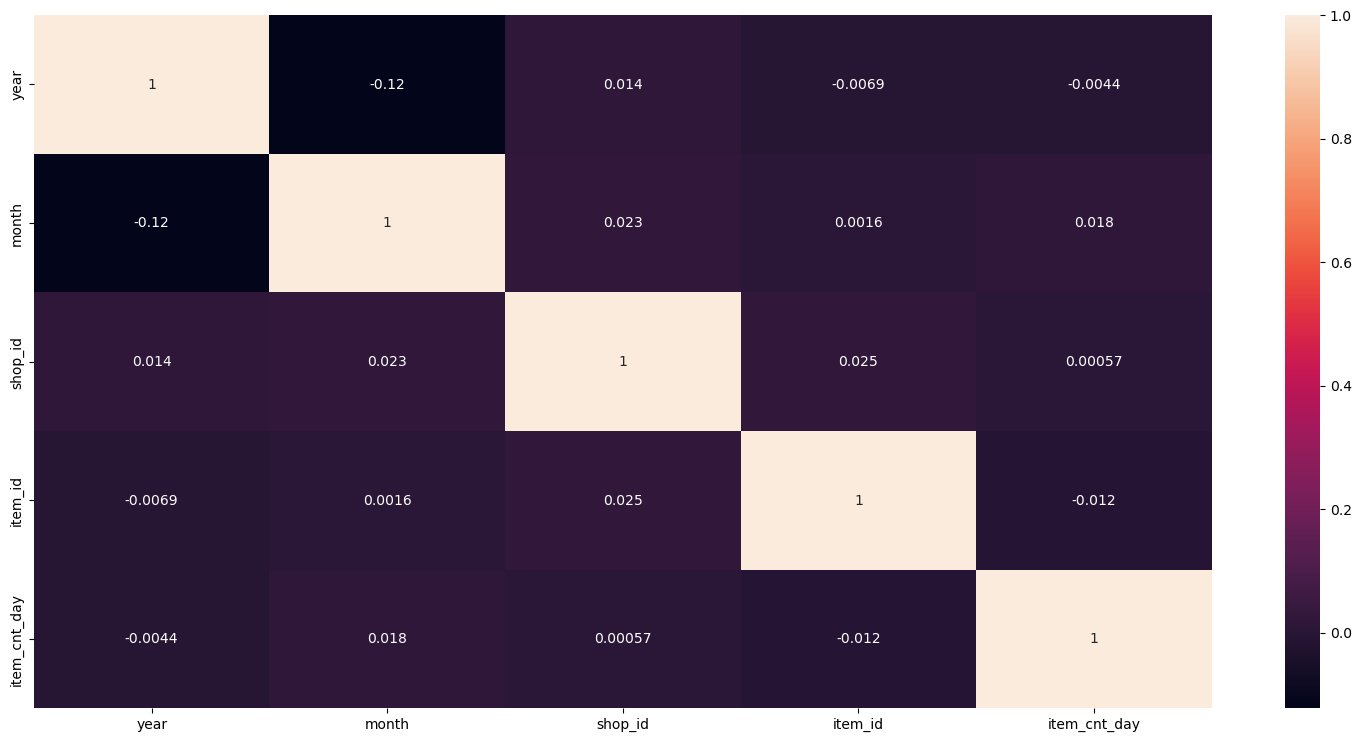

In [41]:
month_item_cnt = train.groupby(['year','month','shop_id','item_id'])['item_cnt_day'].sum().reset_index()
month_item_cnt.head()

sns.heatmap(month_item_cnt.corr(), annot=True)


In [42]:

test_shop_ids = test['shop_id'].unique()
test_item_ids = test['item_id'].unique()

month_item_cnt = month_item_cnt[month_item_cnt['shop_id'].isin(test_shop_ids)]
month_item_cnt = month_item_cnt[month_item_cnt['item_id'].isin(test_item_ids)]

month_item_cnt

,year,month,shop_id,item_id,item_cnt_day
3921,2013,1,2,33,1.0
3926,2013,1,2,482,1.0
3928,2013,1,2,491,1.0
3939,2013,1,2,839,1.0
3947,2013,1,2,1007,3.0
...,...,...,...,...,...
1609119,2015,10,59,22087,6.0
1609120,2015,10,59,22088,2.0
1609121,2015,10,59,22091,1.0
1609122,2015,10,59,22100,1.0


In [46]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import neighbors
from sklearn import metrics
from sklearn.model_selection import train_test_split

X,y = month_item_cnt[['year','month','shop_id','item_id']], month_item_cnt['item_cnt_day']

We have splitted X data and y data as 80 % to training part and 20 % to testing part.We have fitted training data to Knn algorithm.

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 25 )
model1 = neighbors.KNeighborsClassifier()
model1.fit(X_train, Y_train)

KNeighborsClassifier()

Calculated the error and accuracy score for training and test data. We can see that the accuracy is very low for test data compared with train data.Error is very high

In [48]:
print('KNN accuracy for training data is:',model1.score(X_train,Y_train))
print('MSE: ',mean_squared_error(Y_train,model1.predict(X_train)))
model1.predict(X_test)
accuracy = model1.score(X_test, Y_test)
print('KNN accuracy for test data is :',accuracy)  


KNN accuracy for training data is: 0.667590033470311
MSE:  69.31962584899412
KNN accuracy for test data is : 0.5674236870167956


importing RandomForest algorithm and fitting it to model.Checking the accuracy score and error.

In [49]:
from sklearn.ensemble import RandomForestRegressor

model2=RandomForestRegressor()
model2.fit(X_train,Y_train)
print('Random Forest accuracy for training data is:',model2.score(X_train,Y_train))
print('MSE: ',mean_squared_error(Y_train,model2.predict(X_train)))
model2.predict(X_test)
accuracy_ = model2.score(X_test, Y_test)
print('Random Forest accuracy for test data is :',accuracy_)


Random Forest accuracy for training data is: 0.9697348154667251
MSE:  3.61544280971493
Random Forest accuracy for test data is : 0.7203095424038799


We can observe that training accuracy is good , error is less but test accuracy is low. So we will scale the values 
so that we get good accuracy for both training and testing data.

In [50]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = RobustScaler() 
data_scaled = scaler.fit_transform(month_item_cnt)


def min_max_scaling(df):
    data_N = df.copy()
    for column in data_N.columns:
        data_N[column] = (data_N[column] - data_N[column].min()) / (data_N[column].max() - data_N[column].min())
        
    return data_N
     
X = month_item_cnt[['year','month','shop_id','item_id']]
df_normalized = min_max_scaling(X)

In [63]:
# we are using robust scalara and min_max_scalar

In [51]:
print('mean : ', data_scaled.mean(axis=0))
print('std : ', data_scaled.std(axis=0))

mean :  [ 0.21820218 -0.09193264  0.03791632  0.08433205  1.69037538]
std :  [ 0.76556507  0.67239988  0.60320624  0.56406817 10.79324602]


In [52]:
print('Min : ', data_scaled.min(axis=0))
print('Max : ', data_scaled.max(axis=0))

Min :  [-1.         -1.2        -1.03571429 -0.82512068 -5.        ]
Max :  [1.00000000e+00 1.00000000e+00 1.00000000e+00 1.19118317e+00
 1.30400000e+03]


In [53]:
X = data_scaled
Y = month_item_cnt['item_cnt_day']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 25 )

In [54]:
#robust scalar for Knn
method1 = neighbors.KNeighborsClassifier()
method1.fit(X_train, Y_train)
accuracy = method1.score(X_test, Y_test)
print('KNN accuracy for test data:',accuracy)

KNN accuracy for test data: 0.9988336443615036


We used robust scalar fitted to X data and we can observe that the test accuracy is very good.

In [55]:
#normalization for Knn
X = df_normalized
Y = month_item_cnt['item_cnt_day']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 25 )

In [56]:
method1 = neighbors.KNeighborsClassifier()
method1.fit(X_train, Y_train)
accuracy = method1.score(X_test, Y_test)
accuracy
# using min_max scalar the accuracy for test is same as before.

0.5567515329245535

In [57]:
#robust scalar for Random Forest
X = data_scaled
Y = month_item_cnt['item_cnt_day']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 25 )
model2=RandomForestRegressor()
model2.fit(X_train,Y_train)
accuracy = model2.score(X_test, Y_test)
print('Random Forest accuracy for test data',accuracy)


Random Forest accuracy for test data 0.9999672120882218


In [58]:
#normalization for Random Forest
X = df_normalized
Y = month_item_cnt['item_cnt_day']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 25 )
model2=RandomForestRegressor()
model2.fit(X_train,Y_train)
accuracy = model2.score(X_test,Y_test)
accuracy
 

0.7260673486808322

In [357]:
test_df = test.copy()
test_df['year'] = '2015'
test_df['month'] = '11'

res= Actual.predict(test_df[['year','month','shop_id','item_id']])
result = pd.DataFrame(res)

final_res = pd.merge(test_df, result, left_index=True, right_index=True)
final_res = final_res.rename(columns={0:'item_cnt_month'})
final_result = final_res[['ID','item_cnt_month']]
final_result.shape

(214200, 3)

In [420]:
final_res

,ID,shop_id,item_id,item_name,item_category_id,item_category_name,item_cnt_month,year,month,item_cnt_month
0,0,5,5037,"NHL 15 [PS3, русские субтитры]",19,Игры - PS3,0.5,2015,11,1.24
1,1,5,5320,ONE DIRECTION Made In The A.M.,55,Музыка - CD локального производства,0.5,2015,11,1.50
2,2,5,5233,"Need for Speed Rivals (Essentials) [PS3, русск...",19,Игры - PS3,0.5,2015,11,1.25
3,3,5,5232,"Need for Speed Rivals (Classics) [Xbox 360, ру...",23,Игры - XBOX 360,0.5,2015,11,1.18
4,4,5,5268,"Need for Speed [PS4, русская версия]",20,Игры - PS4,0.5,2015,11,1.01
...,...,...,...,...,...,...,...,...,...,...
214195,214195,45,18454,СБ. Союз 55,55,Музыка - CD локального производства,0.5,2015,11,1.15
214196,214196,45,16188,Настольная игра Нано Кёрлинг,64,Подарки - Настольные игры,0.5,2015,11,1.02
214197,214197,45,15757,НОВИКОВ АЛЕКСАНДР Новая коллекция,55,Музыка - CD локального производства,0.5,2015,11,1.31
214198,214198,45,19648,ТЕРЕМ - ТЕРЕМОК сб.м/ф (Регион),40,Кино - DVD,0.5,2015,11,1.02
